In [1]:
import pandas as pd
import numpy  as np
import sklearn 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
datapath = r"NASDAQ_DATA.csv"

data = pd.read_csv(datapath)

print(data.shape)
data.head()

(744, 4)


,S&P500,NASDAQ,50SMA,13RSI
0,4377.5,14168.6,14121.1,59.3
1,4351.3,14053.2,14118.1,48.0
2,4342.6,14079.3,14117.0,50.9
3,4321.2,14038.1,14115.6,46.1
4,4331.8,14092.9,14114.6,52.5


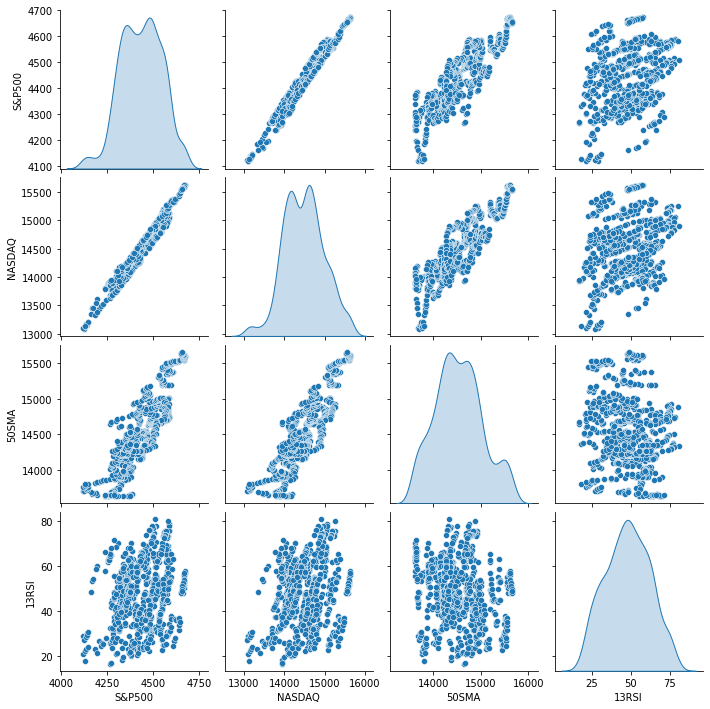

In [21]:
import seaborn as sns
datasets = data.iloc[:, 0:]
sns.pairplot(datasets,diag_kind="kde")

The Data has to be converted to a numpy array before it can be used to get for the correlation coefficient

In [22]:
y = np.array(data["NASDAQ"])
x = np.array(data["S&P500"])

np.corrcoef(x,y)


array([[1.        , 0.98061406],
       [0.98061406, 1.        ]])

Data has to be reshaped into one column but unkown rows (-1,1)

In [17]:

x = data["S&P500"].values.reshape(-1,1)
y = data["NASDAQ"].values.reshape(-1,1)


reg = LinearRegression()
reg = reg.fit(x,y)

r2 = reg.score(x,y)
print(f"model is y = {reg.coef_[0][0]}x + {reg.intercept_[0]} \n The Rsquared is {reg.score(x,y)}")

predictions = reg.predict(x)

model is y = 4.383379164907977x + -4953.345803046606 
 The Rsquared is 0.9616039280636174


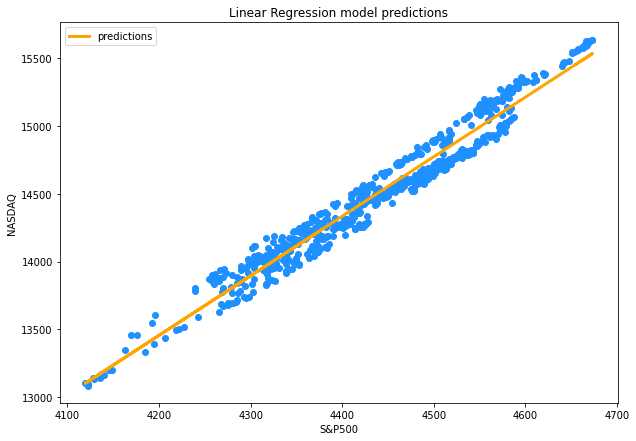

In [20]:

plt.figure(figsize=(10,7))
plt.xlabel("S&P500")
plt.ylabel("NASDAQ")
plt.plot(x,predictions,c='Orange',label='predictions',linewidth=3)
plt.scatter(x,y, c="dodgerblue")
plt.title("Linear Regression model predictions")
plt.legend()